In [2]:
import numpy as np 
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
data=pd.read_csv("F:\Python\data\Advertising.csv",index_col=0)
print(data[0:5])

      TV  Weibo  WeChat  Sales
1  230.1   37.8    69.2   22.1
2   44.5   39.3    45.1   10.4
3   17.2   45.9    69.3    9.3
4  151.5   41.3    58.5   18.5
5  180.8   10.8    58.4   12.9


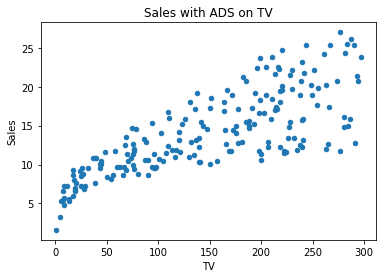

In [8]:
data.plot(kind="scatter",x="TV",y="Sales",title="Sales with ADS on TV")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

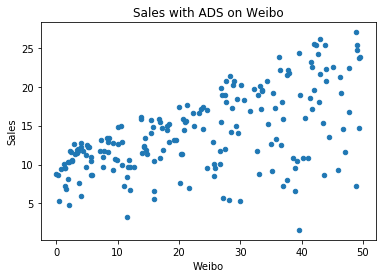

In [9]:
data.plot(kind="scatter",x="Weibo",y="Sales",title="Sales with ADS on Weibo")
plt.xlabel("Weibo")
plt.ylabel("Sales")
plt.show()

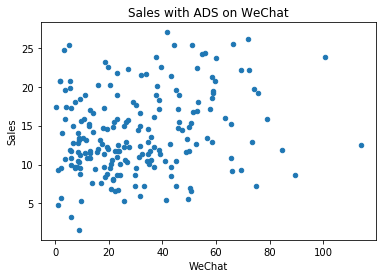

In [10]:
data.plot(kind="scatter",x="WeChat",y="Sales",title="Sales with ADS on WeChat")
plt.xlabel("WeChat")
plt.ylabel("Sales")
plt.show()

In [14]:
X=data.iloc[:,0:3].values.astype(float)#建立回归模型，float不加默认整型
Y=data.iloc[:,3].values.astype(float)
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()#初始化模型
linreg.fit(X,Y)#输入数据，学习模型
print(linreg.intercept_,linreg.coef_)

2.93888936946 [ 0.04576465  0.18853002 -0.00103749]


In [16]:
from sklearn.externals import joblib
joblib.dump(linreg,"F:\Python\data\linreg.pkl")#保存至文件

['F:\\Python\\data\\linreg.pkl']

In [19]:
load_linreg=joblib.load("F:\Python\data\linreg.pkl")#从文件读取模型
new_X=np.array([[130.1,87.8,69.2]])
print("六月广告收入：",new_X)
print("预期销售：",load_linreg.predict(new_X))#使用模型预测unexpected EOF while parsing

六月广告收入： [[ 130.1   87.8   69.2]]
预期销售： [ 25.37401071]


In [26]:
from sklearn import model_selection#分出训练集和测试集
X_train,X_test, Y_train,Y_test=model_selection.train_test_split(X,Y,test_size=0.35,random_state=1)

In [29]:
linregTr=LinearRegression()
linregTr.fit(X_train,Y_train)
print(linregTr.intercept_,linregTr.coef_)

2.9324713466 [ 0.04608839  0.18047646  0.00411699]


In [34]:
# 计算模型性能
from sklearn import metrics
Y_train_pred=linregTr.predict(X_train)
Y_test_pred=linregTr.predict(X_test)
train_err=metrics.mean_squared_error(Y_train,Y_train_pred)#训练模型误差
test_err=metrics.mean_squared_error(Y_test,Y_test_pred)#测试模型误差
print("The mean squar error of train and test are:{:2f},{:.2f}".format(train_err,test_err))
predict_score=linregTr.score(X_test,Y_test)
print("The decision conficient is:{:.2f}".format(predict_score))

The mean squar error of train and test are:3.064646,2.32
The decision conficient is:0.91


In [46]:
# 使用所有数据训练的模型性能
predict_score1=linreg.score(X_test, Y_test)
print("The decision coeficient of model trained with all is:{:.2f}".format(predict_score1))
Y_test_pred1=linreg.predict(X_test)
test_err1=metrics.mean_squared_error(Y_test,Y_test_pred1)
print("The mean squar error of test trained with all is:{:.2f}".format(test_err1))

The decision coeficient of model trained with all is:0.92
The mean squar error of test trained with all is:2.23


In [49]:
x_all_train,x_all_test,y_all_train,y_all_test=model_selection.train_test_split(X,Y,test_size=1,)
linregall=LinearRegression()
linregall.fit(x_all_train,y_all_train)
print(linregall.intercept_,linregall.coef_)

2.93973960418 [ 0.04582507  0.18836972 -0.00106106]


In [50]:
data=pd.read_csv("F:\Python\data\Advertising.csv",index_col=0)
datahalf=data[0:100]
datahalf

,TV,Weibo,WeChat,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


In [52]:
linreg100=LinearRegression()
x=datahalf.iloc[:,0:3].values.astype(float)
y=datahalf.iloc[:,3].values.astype(float)
linreg100.fit(x,y)
print(linreg100.intercept_,linreg100.coef_)

3.34978539235 [ 0.04551295  0.19208846 -0.01066575]


In [57]:
linreg200=LinearRegression()
x=data[0:200].iloc[:,0:3].values.astype(float)
y=data[0:200].iloc[:,3].values.astype(float)
linreg200.fit(x,y)
print(linreg200.intercept_,linreg200.coef_)

2.93888936946 [ 0.04576465  0.18853002 -0.00103749]


In [58]:
from sklearn import metrics
Y_pred1=linreg100.predict(X_test)
train_err1=metrics.mean_squared_error(Y_test,Y_pred1)

Y_pred2=linreg200.predict(X_test)
train_err2=metrics.mean_squared_error(Y_test,Y_pred2)
print("The mean squar error of test trained with 100&200:{:.2f},{:.2f}".format(train_err1,train_err2))

The mean squar error of test trained with 100&200:2.24,2.23
